In [1]:
## spam classifier made by Sankha  Baidya

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [5]:
df.value_counts

<bound method DataFrame.value_counts of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN   

In [6]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3241,ham,Good Morning my Dear........... Have a great &...,NaN,NaN,NaN
2006,ham,Shopping lor. Them raining mah hard 2 leave or...,NaN,NaN,NaN
5429,ham,"Er yeah, i will b there at 15:26, sorry! Just ...",NaN,NaN,NaN
4423,ham,Update your face book status frequently :),NaN,NaN,NaN
4163,ham,"Its ok, called mom instead have fun",NaN,NaN,NaN


## data cleaning

In [9]:
df. info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [10]:
# df.info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()



In [18]:
df['target']=encoder.fit_transform(df['target'])

In [19]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [20]:
df.sample(5)

,target,text
4830,0,Po de :-):):-):-):-). No need job aha.
1469,0,7 wonders in My WORLD 7th You 6th Ur style 5th...
951,0,Shb b ok lor... Thanx...
4650,1,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...
1865,0,Call to the number which is available in appoi...


In [21]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(403)

In [23]:
df=df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.shape

(5169, 2)

In [26]:
df_copy=df.copy()

## EDA


In [27]:
# x=df['text']
# y=df['target']

In [28]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# x_resampled, y_resampled = smote.fit_resample(x,y)

([<matplotlib.patches.Wedge at 0x24d8b10fec0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

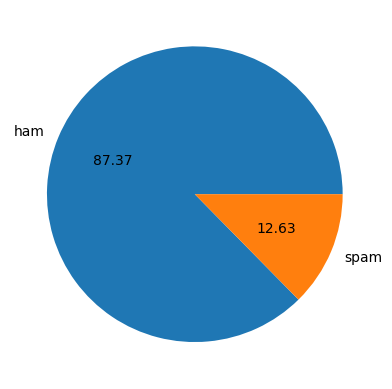

In [29]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [30]:
import nltk

In [31]:
# nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
df['num_characters']=df['text'].apply(len)

C:\Users\arpan\AppData\Local\Temp\ipykernel_22992\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [33]:
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  
0                111  
1                 29  
2                155  
3                 49  
4                 61  
...              ...  
5567

In [34]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
from nltk.tokenize import word_tokenize

print(word_tokenize("This is a test sentence."))


['This', 'is', 'a', 'test', 'sentence', '.']


In [36]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\arpan\AppData\Local\Temp\ipykernel_22992\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [37]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\arpan\AppData\Local\Temp\ipykernel_22992\754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [39]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [43]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

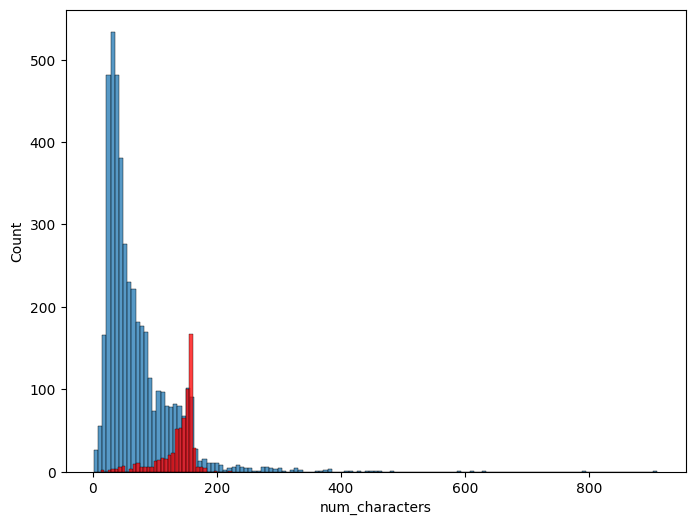

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

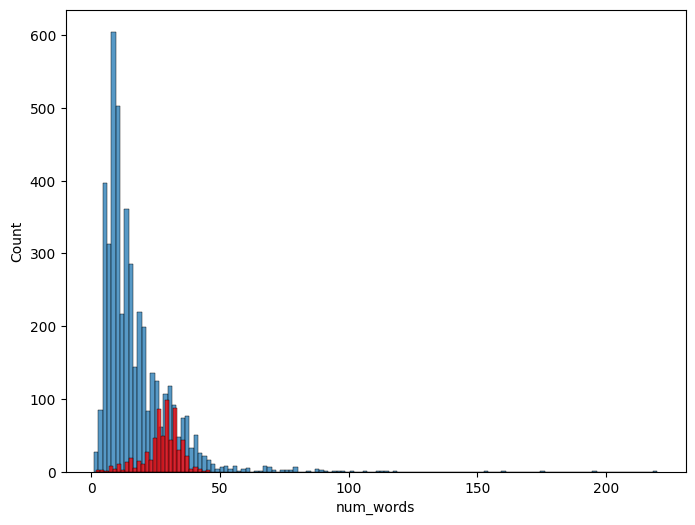

In [45]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

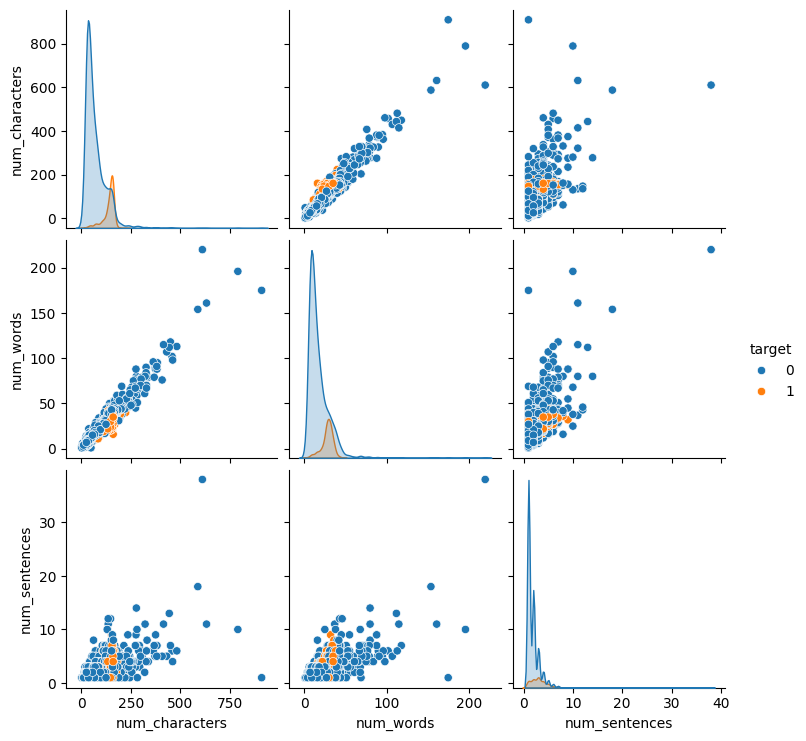

In [46]:
sns.pairplot(df,hue='target')

<Axes: >

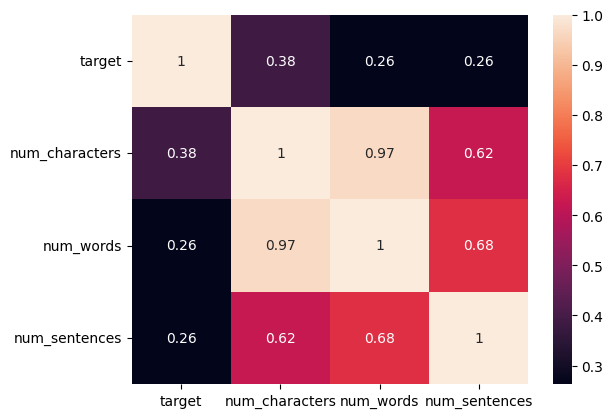

In [47]:
numeric_df = df.drop(['text'], axis=1)
sns.heatmap(numeric_df.corr(), annot=True)

In [48]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
4676,0,Wewa is 130. Iriver 255. All 128 mb.,36,11,3
4420,0,Still at west coast... Haiz... ÌÏ'll take fore...,65,15,1
1512,0,"Hey sweet, I was wondering when you had a mome...",458,102,6
689,1,<Forwarded from 448712404000>Please CALL 08712...,111,19,1
3050,0,Awesome question with a cute answer: Someone a...,135,39,5


## data preprocessing

lower case
tokenization
remove stop words,punctuation
remove special characters
stemming

In [49]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
        
    return " ".join(y)

In [51]:
transform_text('HELLO NITISH HOW ARE YOU ARE YOU COMING FOR BHOPAL EXPLORATION??')

'hello nitish come bhopal explor'

In [52]:
from nltk.stem.porter import PorterStemmer

In [53]:
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\arpan\AppData\Local\Temp\ipykernel_22992\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
from wordcloud import WordCloud

In [58]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

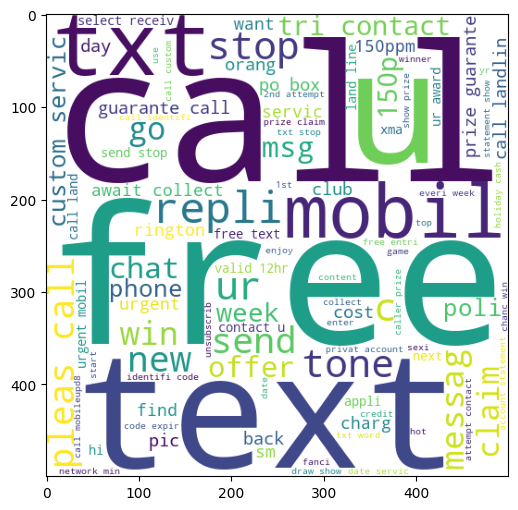

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [60]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg.split():
        spam_corpus.append(word)
    
    

In [62]:
len(spam_corpus)

9939

In [63]:
from collections import Counter
counter_spam_corpus=pd.DataFrame(Counter(spam_corpus).most_common(30))


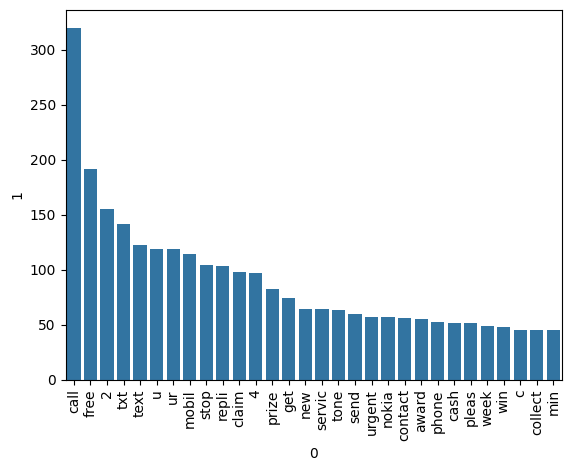

In [64]:
sns.barplot(x=0,y=1,data=counter_spam_corpus)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(spam_corpus)

9939

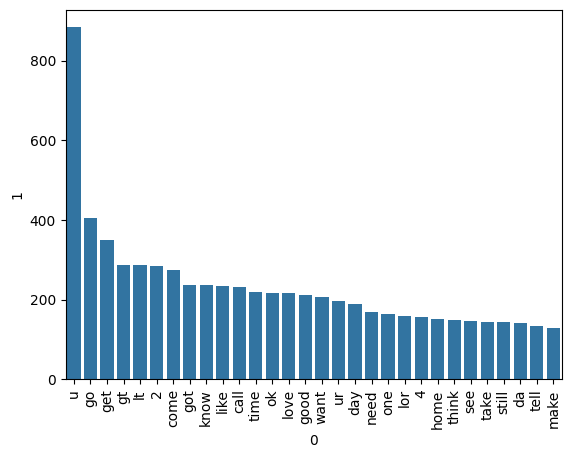

In [67]:
counter_ham_corpus=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=0,y=1,data=counter_ham_corpus)
plt.xticks(rotation='vertical')
plt.show()

## model selection

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=6000)
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
x.shape

(5169, 6000)

In [70]:
y=df['target'].values

In [71]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()


In [72]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)
df_x_resampled=pd.DataFrame(x_resampled)
df_y_resampled=pd.DataFrame(y_resampled)

In [73]:
df_x_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9032 entries, 0 to 9031
Columns: 6000 entries, 0 to 5999
dtypes: float64(6000)
memory usage: 413.5 MB


In [74]:
df_y_resampled[df_y_resampled == 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9032 entries, 0 to 9031
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4516 non-null   float64
dtypes: float64(1)
memory usage: 70.7 KB


In [75]:
df[df['target']==0].info()


<class 'pandas.core.frame.DataFrame'>
Index: 4516 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            4516 non-null   int64 
 1   text              4516 non-null   object
 2   num_characters    4516 non-null   int64 
 3   num_words         4516 non-null   int64 
 4   num_sentences     4516 non-null   int64 
 5   transformed_text  4516 non-null   object
dtypes: int64(4), object(2)
memory usage: 247.0+ KB


([<matplotlib.patches.Wedge at 0x24da3bf6b70>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'ham'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'spam')],
 [Text(-2.6226834001117445e-08, 0.5999999999999994, '50.00'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '50.00')])

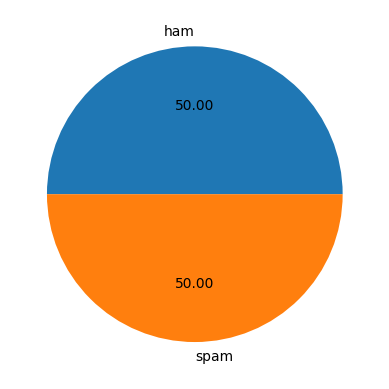

In [76]:
plt.pie(df_y_resampled.value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x_resampled,df_y_resampled,test_size=0.2,random_state=2)


In [78]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print('accuracy=',accuracy_score(y_test,y_pred1))
print('confusion matrix=',confusion_matrix(y_test,y_pred1))
print('precision score=',precision_score(y_test,y_pred1))

accuracy= 0.9789706696181516
confusion matrix= [[881  25]
 [ 13 888]]
precision score= 0.9726177437020811


c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print('accuracy=',accuracy_score(y_test,y_pred2))
print('confusion matrix=',confusion_matrix(y_test,y_pred2))
print('precision score=',precision_score(y_test,y_pred2))

c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy= 0.9905921416712784
confusion matrix= [[906   0]
 [ 17 884]]
precision score= 1.0


In [80]:
gnb.fit(x_train,y_train)
y_pred3=gnb.predict(x_test)
print('accuracy=',accuracy_score(y_test,y_pred3))
print('confusion matrix=',confusion_matrix(y_test,y_pred3))
print('precision score=',precision_score(y_test,y_pred3))

c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy= 0.9236303265080243
confusion matrix= [[768 138]
 [  0 901]]
precision score= 0.8671799807507219


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precisions=precision_score(y_test,y_pred)
    
    return accuracy,precisions

In [84]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9789706696181516, 0.9726177437020811)

In [85]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'BNB':bnb
}

In [86]:
accuracy_scores=[]
prescore=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    print('for',name)
    print('clf=',clf)
    print('accuracy=',current_accuracy)
    print('precision=',current_precision)
    accuracy_scores.append(current_accuracy)
    prescore.append(current_precision)
    

c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for SVC
clf= SVC(gamma=1.0, kernel='sigmoid')
accuracy= 0.9662423907028224
precision= 0.9783599088838268


c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


for KN
clf= KNeighborsClassifier()
accuracy= 0.7094631986718317
precision= 0.6350574712643678
for NB
clf= MultinomialNB()
accuracy= 0.9789706696181516
precision= 0.9726177437020811


c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for DT
clf= DecisionTreeClassifier(max_depth=5)
accuracy= 0.9120088544548977
precision= 0.9244851258581236
for LR
clf= LogisticRegression(penalty='l1', solver='liblinear')
accuracy= 0.9479800774764804
precision= 0.9741480611045829


c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


for RF
clf= RandomForestClassifier(n_estimators=50, random_state=2)
accuracy= 0.9894853348090759
precision= 0.9977426636568849


c:\Users\arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for BNB
clf= BernoulliNB()
accuracy= 0.9905921416712784
precision= 1.0


In [87]:
performance_df=pd.DataFrame({'model':clfs.keys(),'accuracy':accuracy_scores,'precision':prescore}).sort_values('precision',ascending=False)

In [88]:
performance_df

,model,accuracy,precision
6,BNB,0.990592,1.000000
5,RF,0.989485,0.997743
0,SVC,0.966242,0.978360
4,LR,0.947980,0.974148
2,NB,0.978971,0.972618
3,DT,0.912009,0.924485
1,KN,0.709463,0.635057


In [89]:
import pickle


In [90]:
pickle.dump(tfidf,open('vectoriser.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))

In [91]:
texts=("Congrats! You’ve been selected for a $1,000 gift card. Redeem now before it expires: OfferCode: WINBIG2024. Terms apply. Reply STOP to unsubscribe")
transformed_sms = transform_text(texts)
vec_sms = tfidf.transform([transformed_sms])
results = rfc.predict(vec_sms)[0]

In [92]:
results

np.int64(0)